In [310]:
!pip install xgboost

In [311]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import pickle

df=pd.read_csv('https://raw.githubusercontent.com/azrapatvi/Data-Analysis-Projects/refs/heads/main/customer%20churn%20analysis/Customer%20Churn.csv')
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [312]:
pd.set_option("display.max_columns", None)


In [313]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [315]:
df['tenure'].max()

np.int64(72)

In [316]:
def tenure_bins(tenure):
  if tenure>0 and tenure<=12:
    return '0-12'
  elif tenure>12 and tenure<=24:
    return '12-24'
  elif tenure>24 and tenure<=48:
    return '24-48'
  elif tenure>48 and tenure<=60:
    return '48-60'
  elif tenure>60:
    return '60+'
  else:
    return 'no tenure'

df['tenure_bins']=df['tenure'].apply(tenure_bins)


In [317]:
df[df['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_bins
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No,no tenure
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No,no tenure
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No,no tenure
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No,no tenure
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No,no tenure
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No,no tenure
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No,no tenure
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No,no tenure
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No,no tenure
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No,no tenure


In [318]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', '0.0')
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [319]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [320]:
#dropping custoemr id column

df.drop('customerID',axis=1,inplace=True)

In [321]:
for col in df.columns:
  print(f"{col} : {df[col].unique()}")
  print("--"*30)

gender : ['Female' 'Male']
------------------------------------------------------------
SeniorCitizen : [0 1]
------------------------------------------------------------
Partner : ['Yes' 'No']
------------------------------------------------------------
Dependents : ['No' 'Yes']
------------------------------------------------------------
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
------------------------------------------------------------
PhoneService : ['No' 'Yes']
------------------------------------------------------------
MultipleLines : ['No phone service' 'No' 'Yes']
------------------------------------------------------------
InternetService : ['DSL' 'Fiber optic' 'No']
------------------------------------------------------------
OnlineSecurity : ['No' 'Yes' 'No internet service']
--------

In [322]:
numerical_cols=[i for i in df.columns if df[i].dtypes!='O'] #o means object data type
categorical_cols=[i for i in df.columns if df[i].dtypes=='O']

print(f"total no of numerical cols:{len(numerical_cols)} and numerical columns:{numerical_cols}")
print(f"total no of categorical cols:{len(categorical_cols)} and categorical columns:{categorical_cols}")

total no of numerical cols:4 and numerical columns:['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
total no of categorical cols:17 and categorical columns:['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn', 'tenure_bins']


In [323]:
df['gender'].dtype

dtype('O')

<Axes: xlabel='Churn', ylabel='Count'>

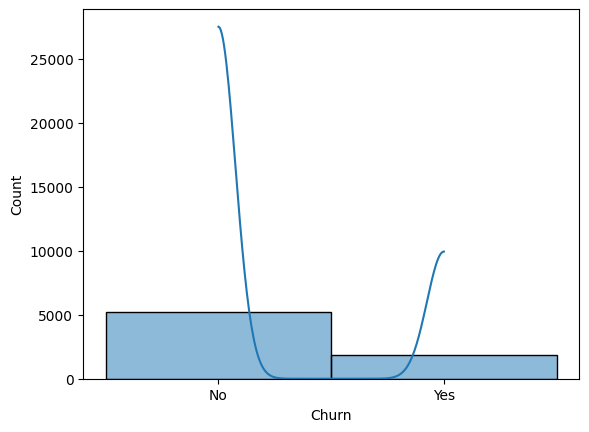

In [324]:
sns.histplot(x='Churn',data=df,kde=True)

In [325]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

Data set is imbalanced

### EDA

In [326]:
df.shape

(7043, 21)

In [327]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [328]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
tenure_bins         0
dtype: int64

In [329]:
df.duplicated().sum()

np.int64(22)

In [330]:
numerical_cols[1:]

['tenure', 'MonthlyCharges', 'TotalCharges']

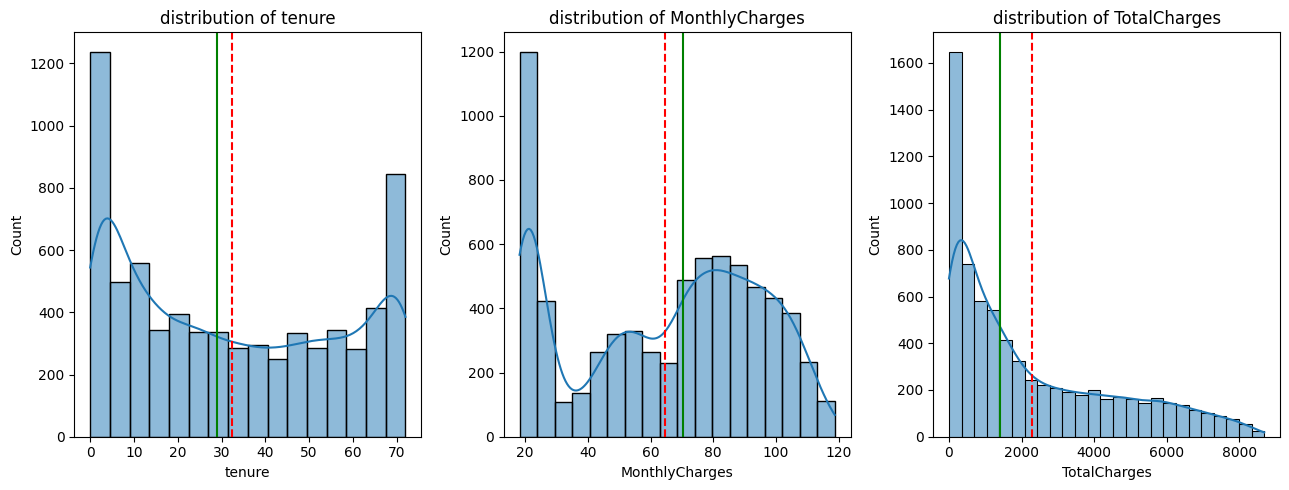

In [331]:
def plotting(col_name,position):
  plt.subplot(1,3,position)

  sns.histplot(df[col_name],kde=True)

  col_mean=df[col_name].mean()
  col_median=df[col_name].median()

  plt.axvline(col_mean,color='red',linestyle='--')
  plt.axvline(col_median,color='green',linestyle='-')

  plt.title(f"distribution of {col_name}")

plt.figure(figsize=(13,5))
numerical_cols2=numerical_cols[1:]
for index,col_name in enumerate(numerical_cols2,start=1):
  plotting(col_name,index)

plt.tight_layout()
plt.show()

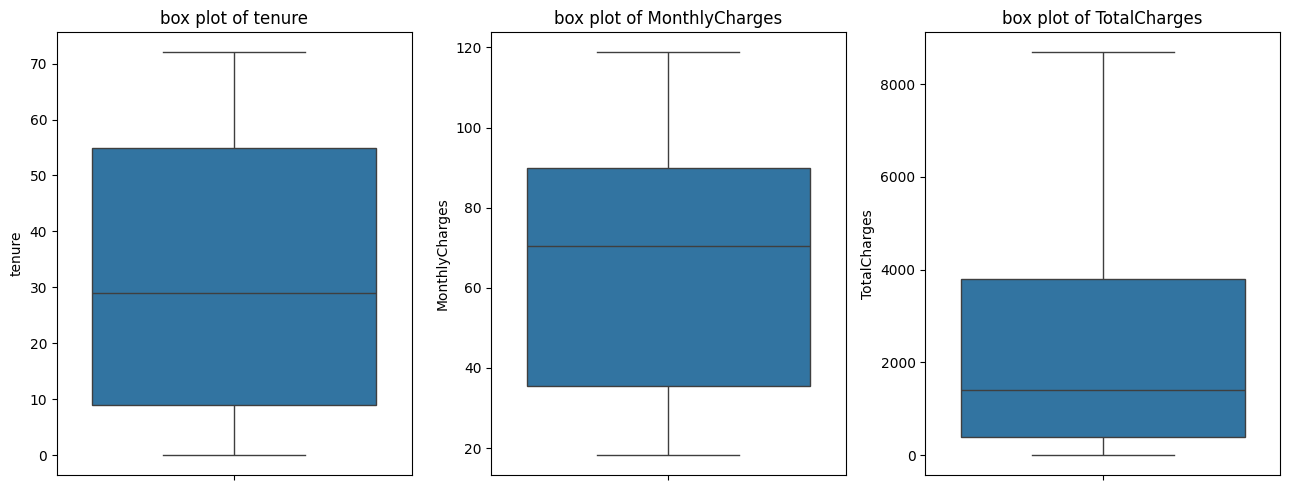

In [332]:
def boxplot_plotting(col_name,position):
  plt.subplot(1,3,position)

  sns.boxplot(df[col_name])

  plt.title(f"box plot of {col_name}")

plt.figure(figsize=(13,5))
for position,col_name in enumerate(numerical_cols2,start=1):
  boxplot_plotting(col_name,position)

plt.tight_layout()
plt.show()

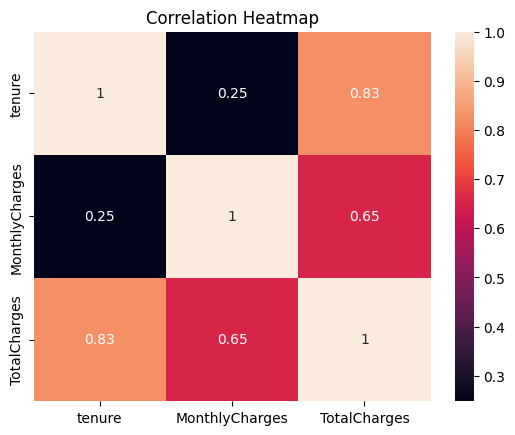

In [333]:
numerical_cols_corr=df[numerical_cols2].corr()

sns.heatmap(numerical_cols_corr,annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [334]:
gb1=df.groupby('gender')['Churn'].value_counts().unstack()

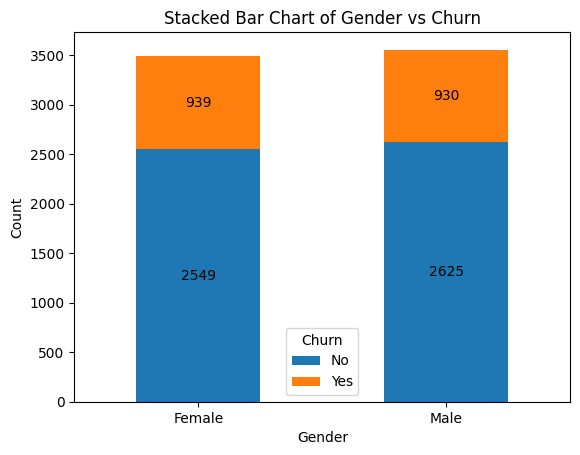

In [335]:
ax=gb1.plot(kind='bar',stacked=True)

for bar in ax.containers:
  ax.bar_label(bar,label_type='center')

plt.title("Stacked Bar Chart of Gender vs Churn")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

In [336]:
categorical_cols2=['SeniorCitizen']+categorical_cols
categorical_cols2

['SeniorCitizen',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn',
 'tenure_bins']

In [337]:
len(categorical_cols2)

18

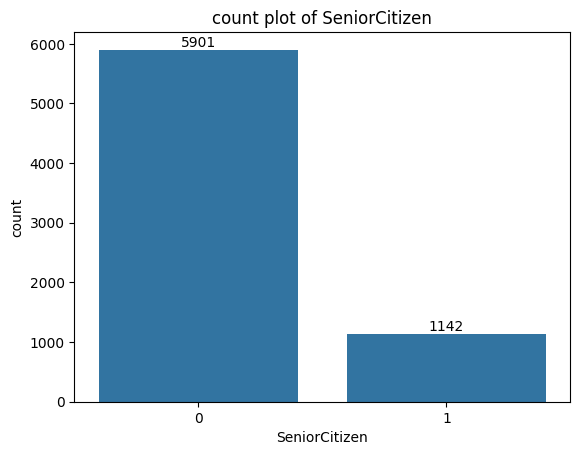

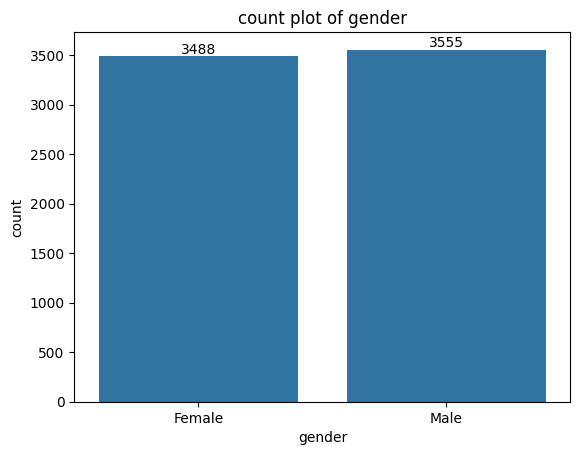

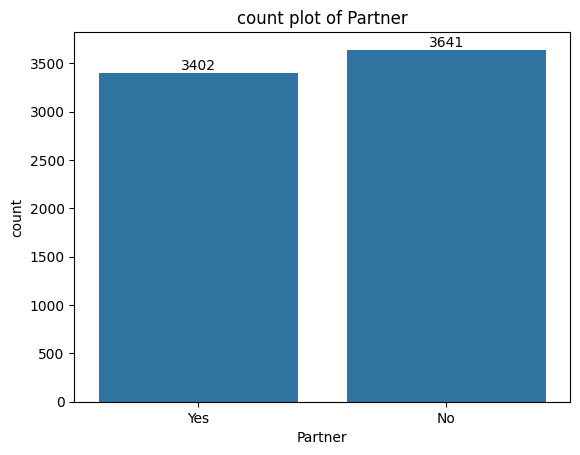

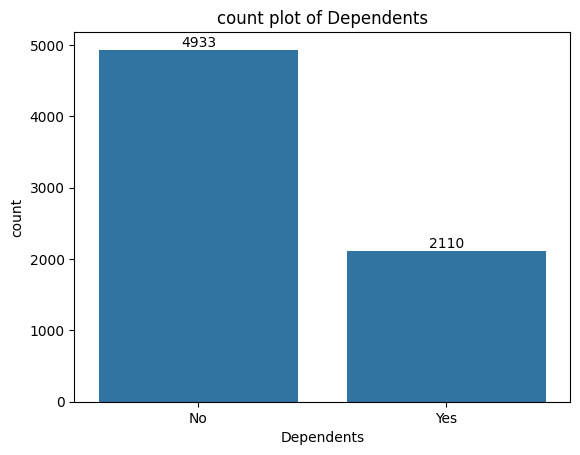

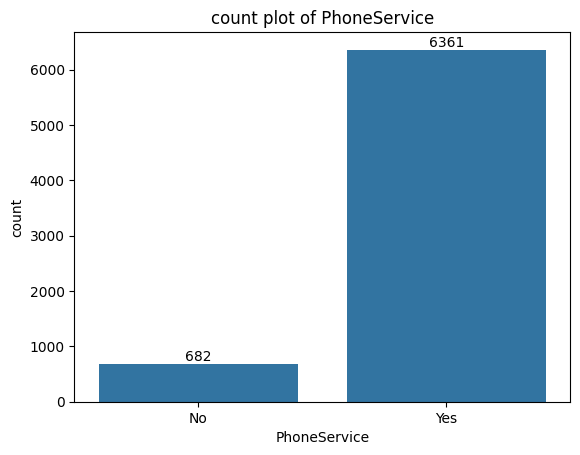

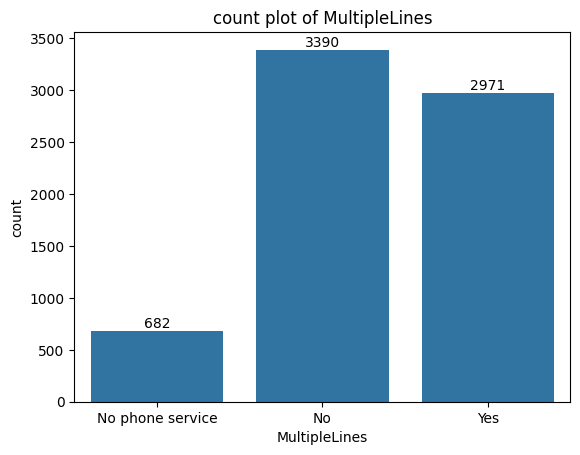

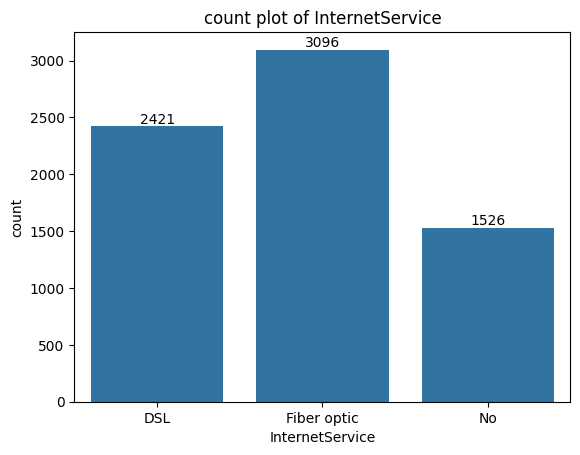

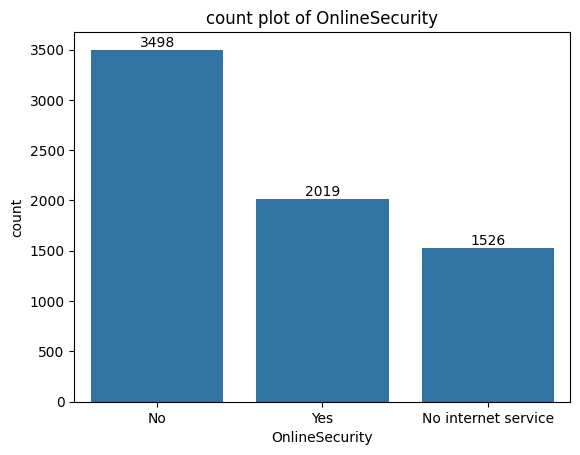

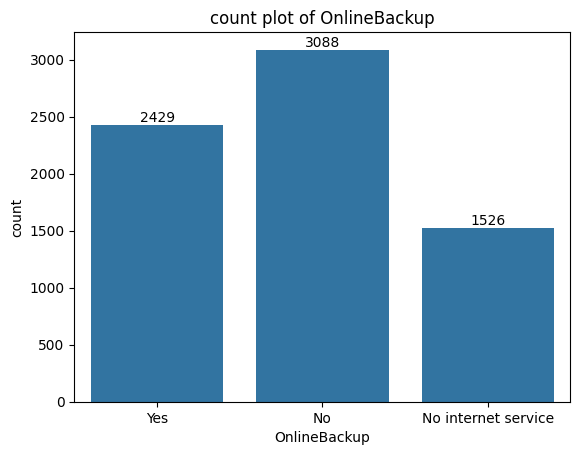

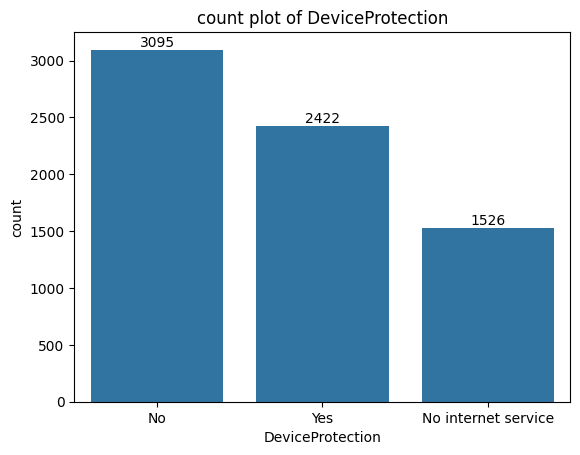

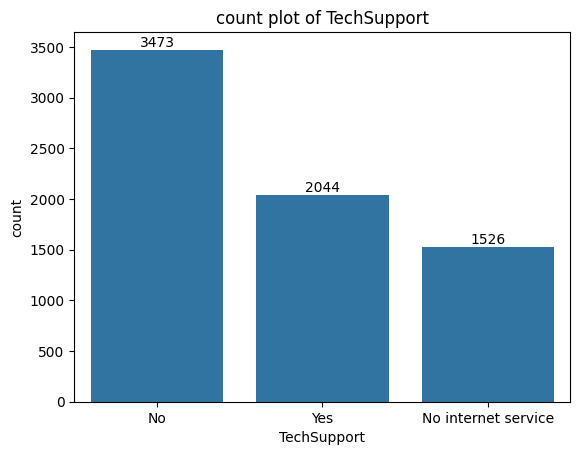

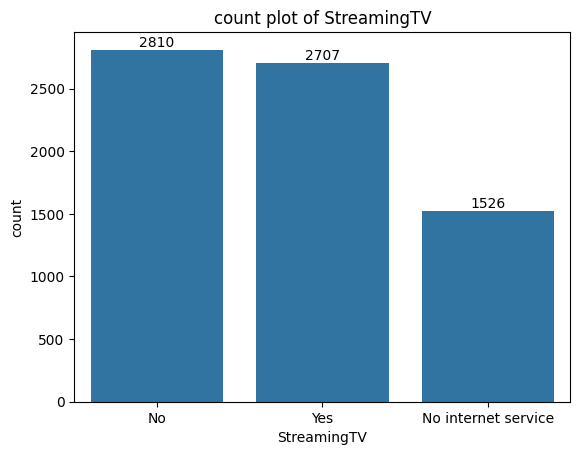

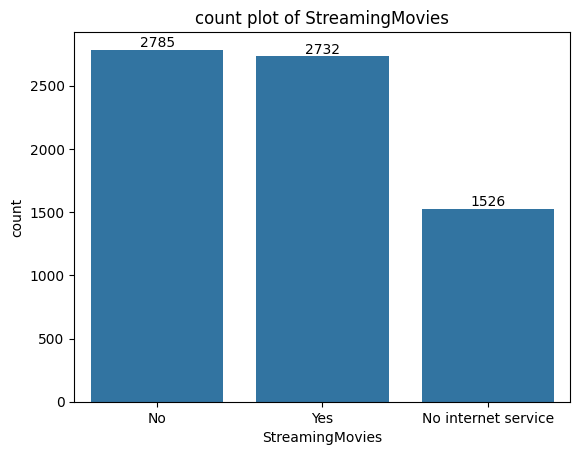

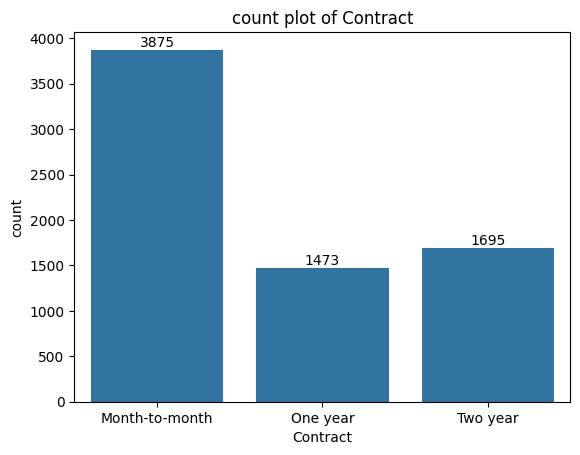

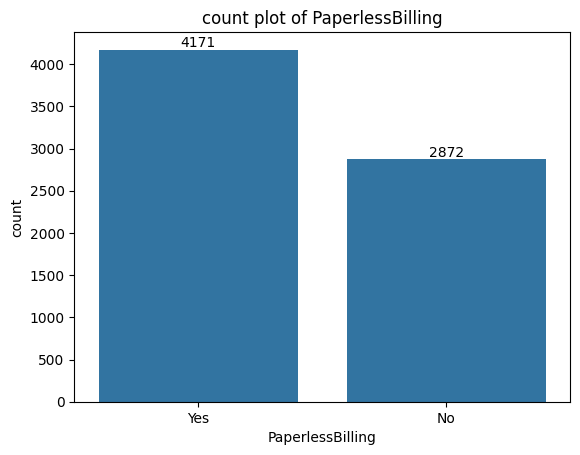

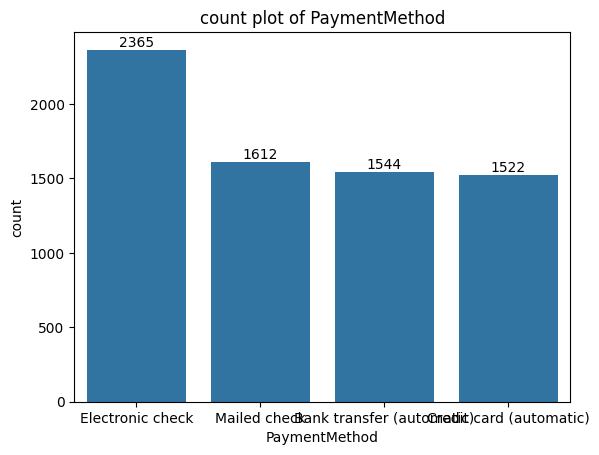

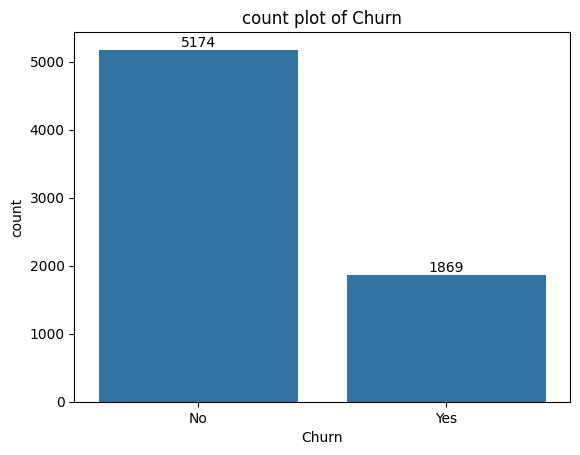

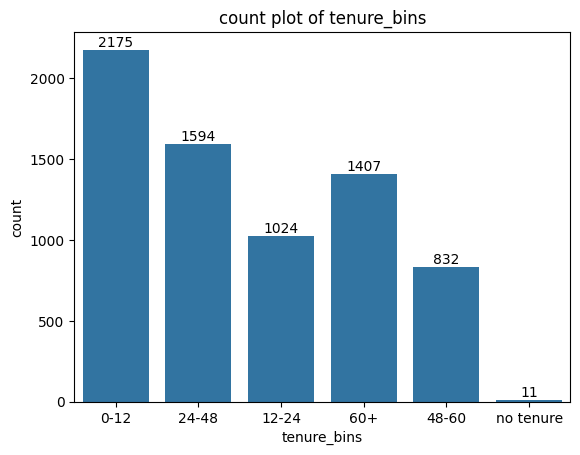

In [338]:
for col_name in categorical_cols2:
  ax=sns.countplot(x=col_name,data=df)
  for bar in ax.containers:
    ax.bar_label(bar)
  plt.title(f"count plot of {col_name}")
  plt.show()

In [339]:
df['Churn']=df['Churn'].map({'Yes':1,'No':0})

In [340]:
df['Churn'].unique()

array([0, 1])

In [341]:
categorical_cols2

['SeniorCitizen',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn',
 'tenure_bins']

In [342]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_bins
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0-12
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,24-48


In [343]:
categorical_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn',
 'tenure_bins']

In [344]:
df.drop('tenure_bins',axis=1,inplace=True)

In [345]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [346]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [347]:
ls1=[i for i in df.columns if df[i].dtypes=='object']
ls1

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [377]:
from sklearn.preprocessing import LabelEncoder
import pickle

encoders = {}

for col in ls1:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])
    encoders[col] = encoder

with open('encoders.pkl', 'wb') as f:
    pickle.dump(encoders, f)

print("Encoders saved successfully")


Encoders saved successfully


In [349]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [350]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0


In [351]:
X=df.drop('Churn',axis=1)
y=df['Churn']

In [352]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [353]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((5634, 19), (1409, 19), (5634,), (1409,))

In [354]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2142,0,0,0,1,21,1,0,0,2,0,2,0,0,2,1,0,3,64.85,1336.80
1623,0,0,0,0,54,1,2,1,0,2,0,0,2,2,2,1,0,97.20,5129.45
6074,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,2,23.45,23.45
1362,1,0,0,0,4,1,0,1,0,0,0,0,0,0,0,1,2,70.20,237.95
6754,1,0,0,1,0,1,2,0,2,2,0,2,0,0,2,1,0,61.90,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,1,0,1,0,1,1,0,1,2,0,0,0,2,2,0,1,2,95.00,95.00
5191,0,0,1,1,23,1,2,0,2,2,2,2,2,2,2,1,1,91.10,2198.30
5226,1,0,1,1,12,1,0,2,1,1,1,1,1,1,0,1,2,21.15,306.05
5390,1,1,0,0,12,1,2,1,0,0,2,0,2,2,0,1,2,99.45,1200.15


In [355]:
print(y_train.value_counts()) # y_train is our target variable
print(y_test.value_counts())

Churn
0    4138
1    1496
Name: count, dtype: int64
Churn
0    1036
1     373
Name: count, dtype: int64


In [356]:
smote=SMOTE(random_state=42)
X_train_smote,y_train_smote=smote.fit_resample(X_train,y_train)

In [357]:
X_train_smote

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,0,1,21,1,0,0,2,0,2,0,0,2,1,0,3,64.850000,1336.800000
1,0,0,0,0,54,1,2,1,0,2,0,0,2,2,2,1,0,97.200000,5129.450000
2,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,2,23.450000,23.450000
3,1,0,0,0,4,1,0,1,0,0,0,0,0,0,0,1,2,70.200000,237.950000
4,1,0,0,1,0,1,2,0,2,2,0,2,0,0,2,1,0,61.900000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8271,0,0,0,0,5,1,0,1,0,0,0,0,2,1,0,1,1,88.121375,451.834304
8272,0,0,0,0,44,1,0,1,0,0,1,0,0,2,0,1,1,90.725171,4048.457431
8273,0,0,0,0,35,1,2,1,0,1,1,0,2,1,0,1,2,101.603909,3547.522160
8274,0,0,0,0,44,0,0,1,0,0,0,1,0,0,0,0,1,20.891535,933.033556


In [358]:
print(y_train_smote.value_counts())

Churn
0    4138
1    4138
Name: count, dtype: int64


In [361]:
models={
    "Logistic Regression":LogisticRegression(random_state=42),
    "Decision Tree":DecisionTreeClassifier(random_state=42),
    "Random Forest Classifier":RandomForestClassifier(random_state=42),
    'XGBoost':XGBClassifier(random_state=42)
}

In [362]:
models.keys()

dict_keys(['Logistic Regression', 'Decision Tree', 'Random Forest Classifier', 'XGBoost'])

In [363]:
cv_scores={}

for model_name,model in models.items():
    print(model_name)
    scores=cross_val_score(model,X_train_smote,y_train_smote,cv=5,scoring='accuracy')
    cv_scores[model_name]=scores

    print(f"{model_name} cross validation accuracy is :{round(np.mean(scores),2)}")
    print("-"*50)

Logistic Regression


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

Logistic Regression cross validation accuracy is :0.79
--------------------------------------------------
Decision Tree
Decision Tree cross validation accuracy is :0.78
--------------------------------------------------
Random Forest Classifier
Random Forest Classifier cross validation accuracy is :0.84
--------------------------------------------------
XGBoost
XGBoost cross validation accuracy is :0.83
--------------------------------------------------


In [364]:
print(cv_scores['Logistic Regression'])
print(cv_scores['Decision Tree'])
print(cv_scores['Random Forest Classifier'])
print(cv_scores['XGBoost'])

[0.74094203 0.75045317 0.81812689 0.81450151 0.82960725]
[0.68115942 0.71903323 0.81752266 0.84350453 0.84350453]
[0.72705314 0.76676737 0.90453172 0.89244713 0.89848943]
[0.71074879 0.75226586 0.90271903 0.89123867 0.89909366]


In [366]:
print(np.mean(cv_scores['Logistic Regression']))

0.7907261701475546


In [365]:
cv_scores


{'Logistic Regression': array([0.74094203, 0.75045317, 0.81812689, 0.81450151, 0.82960725]),
 'Decision Tree': array([0.68115942, 0.71903323, 0.81752266, 0.84350453, 0.84350453]),
 'Random Forest Classifier': array([0.72705314, 0.76676737, 0.90453172, 0.89244713, 0.89848943]),
 'XGBoost': array([0.71074879, 0.75226586, 0.90271903, 0.89123867, 0.89909366])}

from above the random forest classifier has highest accuracy

In [ ]:
model=RandomForestClassifier(n_estimators=100,random_state=42)

In [ ]:
model.fit(X_train_smote,y_train_smote)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
accuracy_s=accuracy_score(y_test,y_pred)
print("accuracy:",accuracy_s)

confusion_m=confusion_matrix(y_test,y_pred)
print("confusion matrix:\n",confusion_m)

classification_r=classification_report(y_test,y_pred)
print("classification report:\n",classification_r)

accuracy: 0.7771469127040455
confusion matrix:
 [[880 156]
 [158 215]]
classification report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.58      0.58      0.58       373

    accuracy                           0.78      1409
   macro avg       0.71      0.71      0.71      1409
weighted avg       0.78      0.78      0.78      1409



In [ ]:
with open('model.pkl','wb')as f:
    pickle.dump(model,f)

In [388]:
input_data = [
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges'
]


In [389]:
df_new_data=pd.DataFrame([input_data])
df_new_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges


In [390]:
import pandas as pd

df_new_data = pd.DataFrame([{
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 1,
    'PhoneService': 'No',
    'MultipleLines': 'No phone service',
    'InternetService': 'DSL',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 29.85,
    'TotalCharges': 29.85
}])


In [378]:
import os
print(os.path.getsize('encoders.pkl')) 

1442


In [391]:
with open('encoders.pkl', 'rb') as f:
    encoders = pickle.load(f)

for col, encoder in encoders.items():
    df_new_data[col] = df_new_data[col].astype(str)
    df_new_data[col] = df_new_data[col].apply(
        lambda x: x if x in encoder.classes_ else encoder.classes_[0]
    )
    df_new_data[col] = encoder.transform(df_new_data[col])


In [393]:
df_new_data = df_new_data[input_data]


In [395]:
with open('model.pkl','rb') as f:
    model=pickle.load(f)

In [396]:
model.fit(X_train_smote, y_train_smote)


RandomForestClassifier(random_state=42)

In [397]:
prediction = model.predict(df_new_data)
probability = model.predict_proba(df_new_data)

print("Churn Prediction:", prediction)
print("Probability:", probability)


Churn Prediction: [1]
Probability: [[0.37 0.63]]
